# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create empty lists to store the data for each weather field
city_name = []
lat = []
lng = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = [] 
max_temp = []

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Start of the print log
print("Beginning Data Retrieval")
print("------------------------")

count = 0

# Loop through cities 
for city in cities:
    
    # Create query url
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Retrieve the json response 
    weather_json = requests.get(query_url).json()
    
    # Increase count
    count += 1

    try:
        # Print city name
        name = weather_json["name"]
        print(f"Processing Record {count} of {len(cities)}: {name}")
    
        city_name.append(weather_json["name"])
        cloudiness.append(weather_json["clouds"]["all"])
        country.append(weather_json["sys"]["country"])
        date.append(weather_json["dt"])
        humidity.append(weather_json["main"]["humidity"])
        max_temp.append(weather_json["main"]["temp_max"])
        wind_speed.append(weather_json["wind"]["speed"])
        lat.append(weather_json["coord"]["lat"])
        lng.append(weather_json["coord"]["lon"])

    except:
        print("City not found. Skipping...")
        pass
    
    #time.sleep(1)

print("-----------------------")
print("Data Retrievel Complete")
print("-----------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 of 617: Bismarck
Processing Record 2 of 617: Bredasdorp
Processing Record 3 of 617: Faanui
Processing Record 4 of 617: Flinders
City not found. Skipping...
Processing Record 6 of 617: Bluff
Processing Record 7 of 617: Trelew
Processing Record 8 of 617: Dikson
Processing Record 9 of 617: New Norfolk
Processing Record 10 of 617: Diamantino
Processing Record 11 of 617: Hermanus
Processing Record 12 of 617: Erenhot
Processing Record 13 of 617: Mackay
Processing Record 14 of 617: Port Moresby
Processing Record 15 of 617: Cidreira
Processing Record 16 of 617: Saint George
Processing Record 17 of 617: Puerto Ayora
Processing Record 18 of 617: Cherskiy
Processing Record 19 of 617: Jamestown
Processing Record 20 of 617: Mataura
Processing Record 21 of 617: Ust'-Ordynskiy
Processing Record 22 of 617: Hithadhoo
Processing Record 23 of 617: Port Alfred
Processing Record 24 of 617: Matadi
Processing Record 25 of 617: Provideniya


Processing Record 216 of 617: Yershichi
Processing Record 217 of 617: Porto Empedocle
Processing Record 218 of 617: Murray Bridge
Processing Record 219 of 617: Talnakh
Processing Record 220 of 617: Arlit
Processing Record 221 of 617: Grand Gaube
Processing Record 222 of 617: Koulamoutou
Processing Record 223 of 617: Yatou
Processing Record 224 of 617: Karratha
Processing Record 225 of 617: Chokurdakh
Processing Record 226 of 617: Rosh Pinna
Processing Record 227 of 617: Porto-Novo
Processing Record 228 of 617: Krasnyy Chikoy
City not found. Skipping...
Processing Record 230 of 617: Guaca
Processing Record 231 of 617: Misawa
Processing Record 232 of 617: Saint Paul Harbor
Processing Record 233 of 617: Angoram
Processing Record 234 of 617: Stornoway
Processing Record 235 of 617: Souillac
Processing Record 236 of 617: Anito
Processing Record 237 of 617: Boyolangu
Processing Record 238 of 617: Kuleshovka
City not found. Skipping...
Processing Record 240 of 617: Pangnirtung
Processing Recor

Processing Record 432 of 617: Okhotsk
Processing Record 433 of 617: Asău
Processing Record 434 of 617: Batagay
Processing Record 435 of 617: Örnsköldsvik
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 439 of 617: Narsaq
Processing Record 440 of 617: Dwārka
Processing Record 441 of 617: León
Processing Record 442 of 617: Marawi
Processing Record 443 of 617: Rocha
Processing Record 444 of 617: Ibaiti
Processing Record 445 of 617: Saint-Louis
Processing Record 446 of 617: Alta Gracia
Processing Record 447 of 617: São João da Barra
Processing Record 448 of 617: Hambantota
Processing Record 449 of 617: Calvinia
Processing Record 450 of 617: Bambanglipuro
Processing Record 451 of 617: Lakatoro
Processing Record 452 of 617: Tsuruoka
Processing Record 453 of 617: Vila Franca do Campo
Processing Record 454 of 617: Mayumba
Processing Record 455 of 617: Marsh Harbour
Processing Record 456 of 617: Parnamirim
City not found. Skipping...
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Read csv file
weather_json_df = pd.DataFrame({
    "City": city_name,
    "Country": country,
    "Date": date,
    "Latitude": lat,
    "Longitude": lng,
    "Cloudiness": cloudiness,
    "Humidity": humidity,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
})

# View number of items per column
weather_json_df.head()

,City,Country,Date,Latitude,Longitude,Cloudiness,Humidity,Max Temp,Wind Speed
0,Bismarck,US,1613074880,46.8083,-100.7837,90,54,-7.60,11.50
1,Bredasdorp,ZA,1613074880,-34.5322,20.0403,100,88,71.60,8.05
2,Faanui,PF,1613074880,-16.4833,-151.7500,0,72,81.86,16.26
3,Flinders,AU,1613074880,-34.5833,150.8552,100,88,69.01,1.01
4,Bluff,NZ,1613074848,-46.6000,168.3333,38,78,51.91,10.38


In [5]:
# Export the City_Data into a csv
weather_json_df.to_csv("../output_data/city_weather.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [6]:
# Get the date of data retrived
import datetime
today = datetime.date.today()
print(today)

2021-02-11


## Latitude vs. Temperature Plot

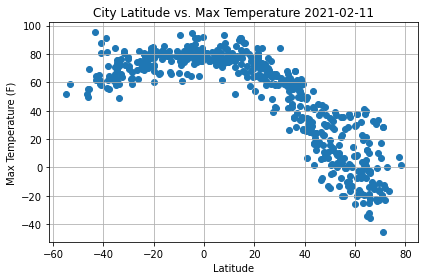

In [7]:
scatter_lat = weather_json_df["Latitude"]
scatter_temp = weather_json_df["Max Temp"]

plt.scatter(scatter_lat,scatter_temp)

# Add labels and title
plt.title(f"City Latitude vs. Max Temperature {today}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Add grid lines
plt.grid()

# Show and save picture
plt.tight_layout()
plt.savefig("../output_data/LatVsTemp.png")
plt.show()

## Latitude vs. Humidity Plot

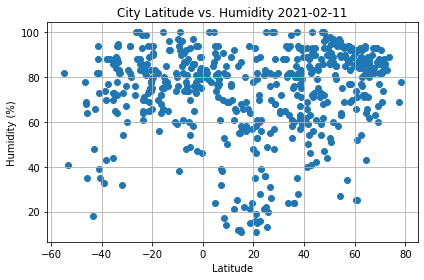

In [8]:
scatter_lat = weather_json_df["Latitude"]
scatter_humidity = weather_json_df["Humidity"]

plt.scatter(scatter_lat,scatter_humidity)

# Add labels and title
plt.title(f"City Latitude vs. Humidity {today}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Add grid lines
plt.grid()

# Ahow and save picture
plt.tight_layout()
plt.savefig("../output_data/LatVsHumidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

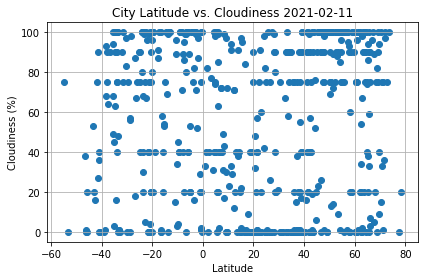

In [9]:
scatter_lat = weather_json_df["Latitude"]
scatter_cloud = weather_json_df["Cloudiness"]

plt.scatter(scatter_lat,scatter_cloud)

# Add labels and title
plt.title(f"City Latitude vs. Cloudiness {today}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Add grid lines
plt.grid()

# Show and save picture
plt.tight_layout()
plt.savefig("../output_data/LatVsCloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

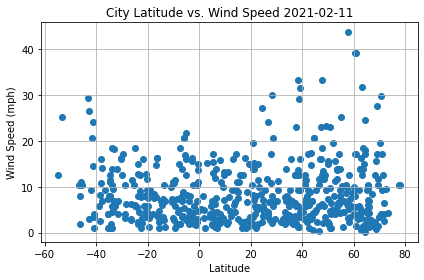

In [10]:
scatter_lat = weather_json_df["Latitude"]
scatter_ws = weather_json_df["Wind Speed"]

plt.scatter(scatter_lat,scatter_ws)

# Add labels and title
plt.title(f"City Latitude vs. Wind Speed {today}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Add grid lines
plt.grid()

# Show and save picture
plt.tight_layout()
plt.savefig("../output_data/LatVsWind.png")
plt.show()

## Linear Regression

In [11]:
# Generate dataframe only for cities in Northern Hemisphere
north_df = weather_json_df.loc[weather_json_df['Latitude'] >= 0]

# Generate dataframe only for cities in Southern Hemisphere
south_df = weather_json_df.loc[weather_json_df['Latitude'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7901083617209617


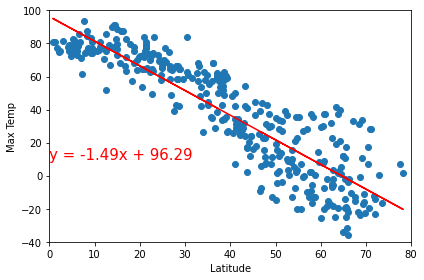

In [12]:
x_values = north_df["Latitude"]
y_values = north_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.ylim(-40, 100)
plt.xlim(0, 80)

print(f"The r-squared is: {rvalue**2}")

plt.tight_layout()
plt.savefig("../output_data/North_Temp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.31200575355541044


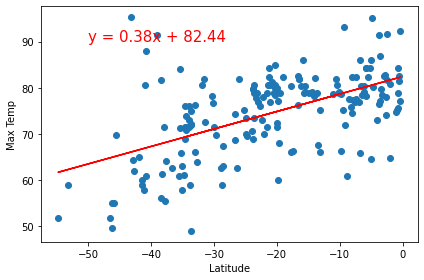

In [13]:
x_values = south_df["Latitude"]
y_values = south_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

print(f"The r-squared is: {rvalue**2}")

plt.tight_layout()
plt.savefig("../output_data/South_Temp.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10015946958888822


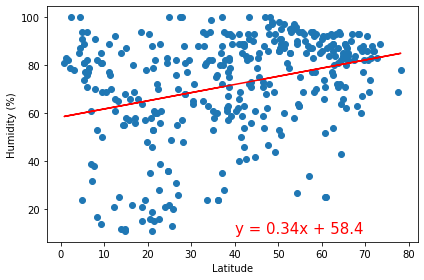

In [14]:
x_values = north_df["Latitude"]
y_values = north_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

print(f"The r-squared is: {rvalue**2}")

plt.tight_layout()
plt.savefig("../output_data/North_Humidity.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.03703148861887303


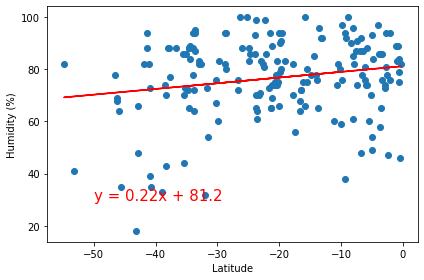

In [15]:
x_values = south_df["Latitude"]
y_values = south_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

print(f"The r-squared is: {rvalue**2}")

plt.tight_layout()
plt.savefig("../output_data/South_Humidity.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05012492722672558


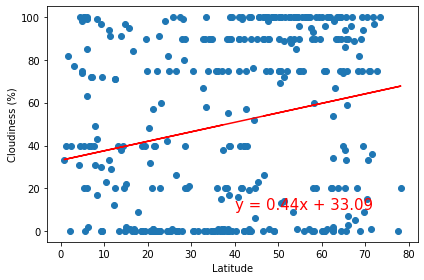

In [16]:
x_values = north_df["Latitude"]
y_values = north_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

print(f"The r-squared is: {rvalue**2}")

plt.tight_layout()
plt.savefig("../output_data/North_Cloudiness.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.030598253075792496


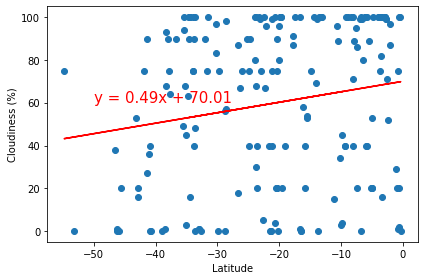

In [17]:
x_values = south_df["Latitude"]
y_values = south_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

print(f"The r-squared is: {rvalue**2}")

plt.tight_layout()
plt.savefig("../output_data/South_Cloudiness.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.018173634861354426


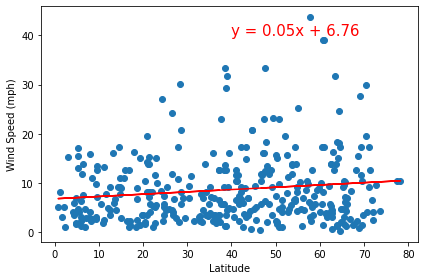

In [18]:
x_values = north_df["Latitude"]
y_values = north_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

print(f"The r-squared is: {rvalue**2}")

plt.tight_layout()
plt.savefig("../output_data/North_WindSpeed.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.028587655764730855


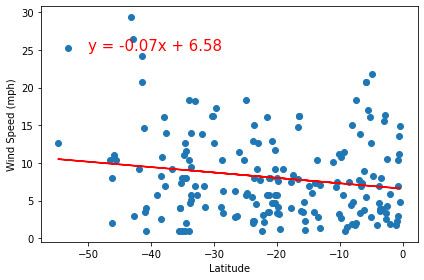

In [19]:
x_values = south_df["Latitude"]
y_values = south_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

print(f"The r-squared is: {rvalue**2}")

plt.tight_layout()
plt.savefig("../output_data/South_WindSpeed.png")
plt.show()